# More Image Manipulation w/ Scipy #
> SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data

Scipy is incredibly rich and very well documented and maintained. To see a breakdown of everything that can be done in `scipy` right off the shelf, go to [docs](https://docs.scipy.org/doc/scipy/tutorial/general.html#scipy-organization)

Here, I am showing several, very non-exaustive examples of the power of scipy

__Filter and Image Manipulation__
- Create a blur effect by applying a guassian filter across the data
- Max pooling with convolutions

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage

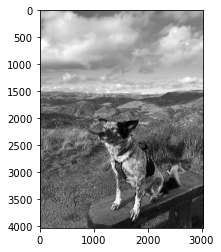

In [6]:
image = Image.open('./george.JPG')
data = np.asarray(image)
data_grey = data * np.array([0.2989,0.5870,0.1140]) / 255
grey_scale = np.sum(data_grey,axis=2).T
plt.imshow(grey_scale, cmap='gray')

__Use `ndimage.guassian_filter` to apply a filter and blur an image__

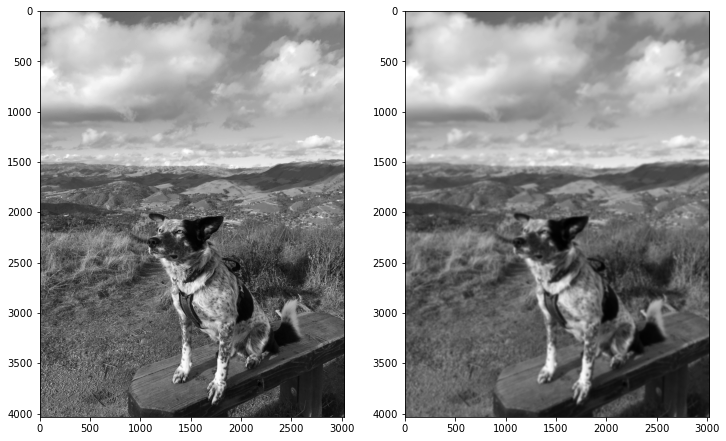

In [52]:
fig = plt.figure()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
smooth_img = ndimage.gaussian_filter(grey_scale, sigma=7)
ax1.imshow(grey_scale)
ax2.imshow(smooth_img)
plt.show()

What if we only wanted to apply that to half of the image?

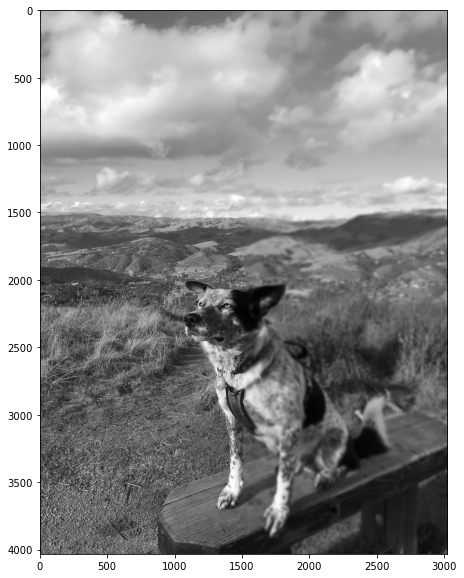

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale

img_width = grey_scale.shape[1]
smooth_img = grey_scale.copy()

smooth_img[:,img_width//2:] = ndimage.gaussian_filter(grey_scale[:,img_width//2:], sigma=7)

ax.imshow(smooth_img)
plt.show()

[Max-pooling](https://paperswithcode.com/method/max-pooling) is an important convolution for machine learning (in particular Neural Networks)

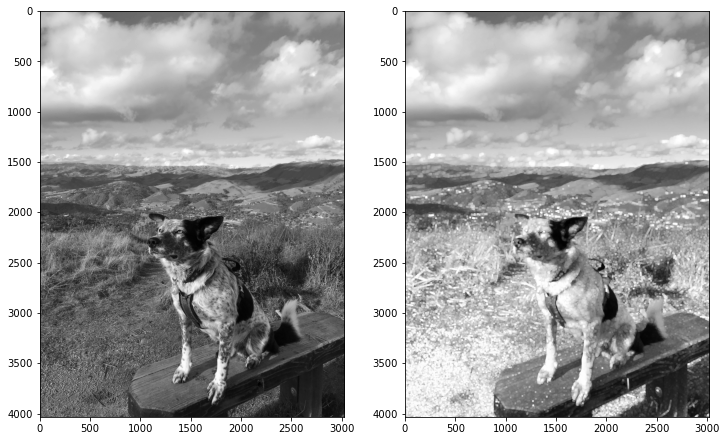

In [23]:
weight = np.ones(shape=(15,15))
convolve_img = ndimage.filters.maximum_filter(grey_scale, footprint=weight)

fig = plt.figure()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(grey_scale)
ax2.imshow(convolve_img)
plt.show()